In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [59]:
img = cv.imread('test/AllStatusEffects.webp', cv.IMREAD_GRAYSCALE)


In [60]:
img2 = img.copy()

In [61]:
template = cv.imread('processed/FulliconStatusEffects_bleeding.png', cv.IMREAD_GRAYSCALE)

In [62]:
w, h = template.shape[::-1]


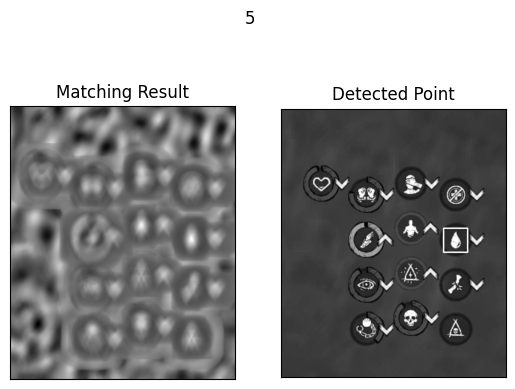

In [63]:
img = img2.copy()
method = eval('cv.TM_CCOEFF_NORMED')

# Apply template matching
res = cv.matchTemplate(img,template,method)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)


# If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
    if min_val < 0.8:
        top_left = min_loc
    else:
        top_left = (0,0)
else:
    if max_val > 0.8:
        top_left = max_loc
    else:
        top_left = (0,0)


bottom_right = (top_left[0] + w, top_left[1] + h)
if top_left != (0,0):
    cv.rectangle(img,top_left, bottom_right, 255, 2)


plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.suptitle(method)

plt.show()

## Multi scale template matching

In [10]:
def multi_scale_template_matching(target_gray, template_gray, threshold=0.8, min_scale=0.5, max_scale=2.0, scale_step=0.1):
    detections = []

    # Iterate through scales
    for scale in np.arange(min_scale, max_scale, scale_step):
        # Resize the template image to the current scale
        resized_template = cv.resize(template_gray, None, fx=scale, fy=scale)

        # Perform template matching
        result = cv.matchTemplate(target_gray, resized_template, cv.TM_CCOEFF_NORMED)

        # Find the locations where the matching score is above the threshold
        locations = np.where(result >= threshold)

        # Add the bounding boxes of the detected icons to the list
        for point in zip(*locations[::-1]):
            detections.append((point, (point[0] + resized_template.shape[1], point[1] + resized_template.shape[0])))

    return detections, result

In [4]:
# Load the target image and the template image
target_image = cv.imread("test/AllStatusEffects.webp", cv.IMREAD_COLOR)
template_image = cv.imread("images/train/bleeding/FulliconStatusEffects_bleeding.webp", cv.IMREAD_COLOR)

# Convert the images to grayscale
target_gray = cv.cvtColor(target_image, cv.COLOR_BGR2GRAY)
template_gray = cv.cvtColor(template_image, cv.COLOR_BGR2GRAY)


In [5]:
# Set the threshold for the matching score and the scale range
threshold = 0.8
min_scale = 0.5
max_scale = 2.0
scale_step = 0.1

In [11]:
# Perform multi-scale template matching
detections, result = multi_scale_template_matching(target_gray, template_gray, threshold, min_scale, max_scale, scale_step)

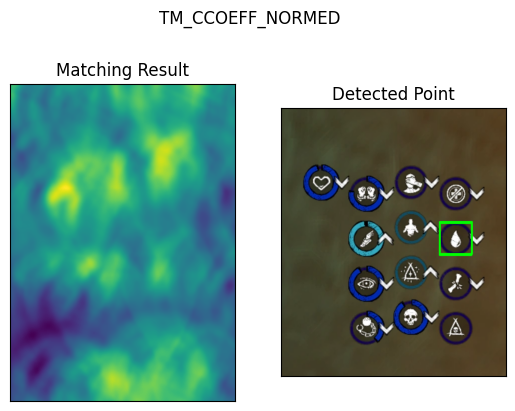

In [14]:
# Draw the bounding boxes around the detected icons
for detection in detections:
    cv.rectangle(target_image, detection[0], detection[1], (0, 255, 0), 2)

# Show the result
plt.subplot(121),plt.imshow(result)
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(target_image)
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.suptitle('TM_CCOEFF_NORMED')

plt.show()